In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

### (a) Loading data

In [2]:
data = np.load('data_all_button_press_window_events_hg.npy')
print(data.shape)

(57, 199)


Number of electrodes: 199; 
Number of time samples each: 57

### (b) Implementing KMeans

In [3]:
def euclidean_distance(a, b):
    return np.linalg.norm(a-b)

In [4]:
# define initial centers
def center_init(k, X):
    n_samples, n_features = X.shape
    centers = np.zeros((k, n_features))
    selected_centers_index = []
    for i in range(k):
        # every round select a center, no repetition
        sel_index = rd.choice(list(set(range(n_samples))-set(selected_centers_index)))
        centers[i] = X[sel_index]
        selected_centers_index.append(sel_index)
    return centers

In [5]:
# define which center is close to the sample point, return the index of the center point
def closest_center(sample, centers):
    closest_i = 0
    closest_dist = float('inf')
    for i, c in enumerate(centers):
        distance = euclidean_distance(sample, c)
        if distance < closest_dist:
            closest_i = i
            closest_dist = distance
    return closest_i

In [6]:
# each cluster store the index of samples
def create_clusters(centers, k, X):
    clusters = [[] for _ in range(k)]
    for sample_i, sample in enumerate(X):
        # assign sample to closest center
        center_i = closest_center(sample, centers)
        clusters[center_i].append(sample_i)
    return clusters

In [7]:
def calculate_new_centers(clusters, k, X):
    n_samples, n_features = X.shape
    centers = np.zeros((k, n_features))
    # set the new centers as the mean of current clusters
    for i, cluster in enumerate(clusters):  # cluster is the index of each catogory after classfication
        new_center = np.mean(X[cluster], axis=0)
        centers[i] = new_center
    return centers

In [8]:
def get_cluster_labels(clusters, X):
    y_pred = np.zeros(np.shape(X)[0])
    for cluster_i, cluster in enumerate(clusters):
        for sample_i in cluster:
            y_pred[sample_i] = cluster_i
    return y_pred.astype(int)

In [9]:
def k_means(X, k):
    max_iterations = 300
    centers = center_init(k, X)
    for _ in range(max_iterations):
        clusters = create_clusters(centers, k, X)
        pre_centers = centers
        new_centers = calculate_new_centers(clusters, k, X)
        diff = new_centers - pre_centers
        if diff.sum() == 0:
            break
    # compute total squared distance
    labels = get_cluster_labels(clusters, X)  
    total_sqrt_distance = 0

    for sample_i, sample in enumerate(X):
        distance = euclidean_distance(sample, centers[labels[sample_i]])
        total_sqrt_distance += distance

    return total_sqrt_distance, labels

In [10]:
total, labels = k_means(data.T, 3) # need transpose, bc Electrodes as instance and time points as features
print(labels, total)

[1 1 2 2 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 2 1 1 2 2 1 1 1 1 0 1 1 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 1 1 1 1 1 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 2 2 1 1 0 1 2 0 1 1 1 0 1 2 0 1 1 2 2 2 0 0 2 2 1 0 2 2 2
 1 2 2 2 2 1 2 2 2 2 2 2 2 2] 1086.9763333724193


### (c) Finding optimal number of clusters

In [16]:
sse = {}
for k in range(1, 21):
    sse[k] = k_means(data.T, k)[0]

/Users/a0/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/a0/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [17]:
sse

{1: 1235.48609495982,
 2: 1071.9393632192498,
 3: 957.0329726000979,
 4: 821.2244632972706,
 5: 810.7200277312181,
 6: 805.9246847125063,
 7: 774.432478884954,
 8: 721.4835612209615,
 9: 734.973170521533,
 10: 696.839011103828,
 11: 688.4155061149756,
 12: 676.576296571408,
 13: 698.1492126624986,
 14: 712.0547815548049,
 15: 623.2334664351656,
 16: 614.16623775333,
 17: 641.1538975701318,
 18: 658.908061624053,
 19: 598.8531823598511,
 20: 623.7267872361829}

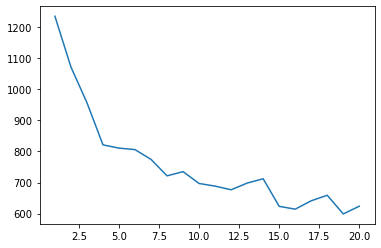

In [18]:
plt.plot(list(sse.keys()), list(sse.values()))

According to the Elbow Method, choose K = 8. The idea is that we want a small SSE, but SSE tends to decrease to 0 as we increase K. So out goal is to choose a small value of K that still have a low SSE, and the elbow usually represents where we start to have diminishing returns by increase K.

### (d) Visualizing clustering results

In [19]:
_, labels = k_means(data.T, 8)

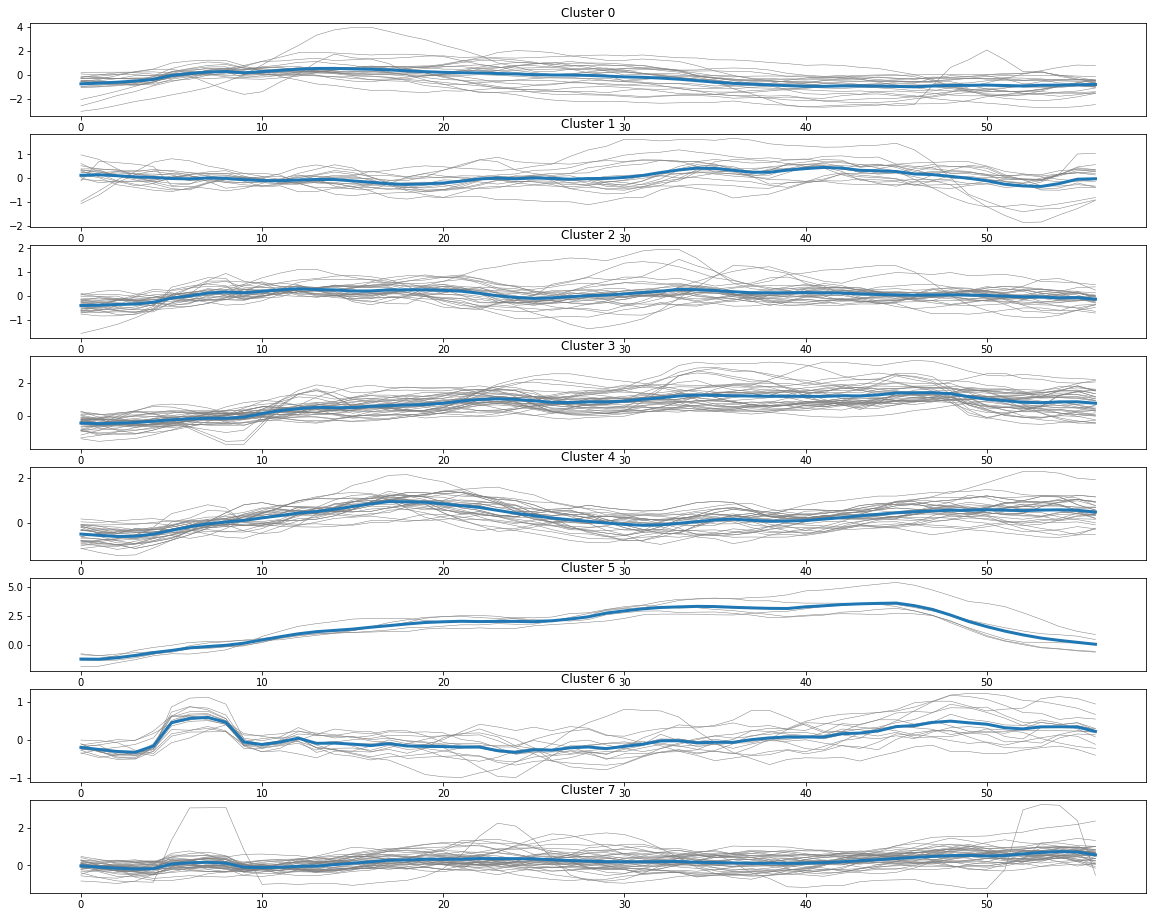

In [20]:
n_clusters = 8
fig, ax = plt.subplots(nrows=n_clusters, ncols=1, figsize=(20,16))

for l in np.arange(n_clusters):
    
    plt.subplot(n_clusters,1,l+1)
    
    plt.plot(data[:,np.where(labels == l)[0]], color = 'gray', linewidth = 0.5)
    plt.plot(np.mean(data[:,np.where(labels == l)[0]], axis = 1), linewidth = 3)
    plt.title("Cluster " + str(l))
    
plt.show()